# Initialize data

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import librosa
import statistics
from scipy.stats import skew, kurtosis


bearingA = pd.read_excel("lozyska polaczone.xlsx",sheet_name='Łożysko_A').iloc[:,0:11].set_index('Time [s]')
bearingB = pd.read_excel("lozyska polaczone.xlsx",sheet_name='Łożysko_B').iloc[:,0:11].set_index('Time [s]')
bearingC = pd.read_excel("lozyska polaczone.xlsx",sheet_name='Łożysko_C').iloc[:,0:11].set_index('Time [s]')
bearingD = pd.read_excel("lozyska polaczone.xlsx",sheet_name='Łożysko_D').iloc[:,0:11].set_index('Time [s]')
bearingE = pd.read_excel("lozyska polaczone.xlsx",sheet_name='Łożysko_E').iloc[:,0:11].set_index('Time [s]')
bearingF = pd.read_excel("lozyska polaczone.xlsx",sheet_name='Łożysko_F').iloc[:,0:11].set_index('Time [s]')
bearingA, bearingF

(              A_P1       A_P2      A_P3      A_P4      A_P5      A_P6  \
 Time [s]                                                                
 0.20004  -0.519396  -0.857482 -3.493313 -4.067562 -4.106657  1.140219   
 0.20016   2.180017  -2.306301 -4.304790 -4.888874 -7.063714 -1.184193   
 0.20028   3.852659  -6.568164 -1.653053  2.848104 -8.963711  0.714433   
 0.20040  -1.038305  -9.880408 -3.249150  3.476073 -5.875597  0.999470   
 0.20052   1.854455  -6.060931 -6.129766 -2.603546 -1.718865  2.852845   
 ...            ...        ...       ...       ...       ...       ...   
 7.84668   5.163884  -3.730574 -3.578094  1.375764 -2.592770 -2.752423   
 7.84680   5.414033  -0.391876 -5.562483  3.157149 -0.717225 -0.955071   
 7.84692   2.640328 -11.806190 -4.744551  6.137130 -4.663985  0.952880   
 7.84704   3.450035 -13.799896 -1.833365  3.692787 -6.056617 -0.714057   
 7.84716   4.667976  -3.848692  0.140911  0.377114 -4.198191  1.467811   
 
               A_P7       A_P8      

In [29]:
bearingA.iloc[:,0]

Time [s]
0.20004   -0.519396
0.20016    2.180017
0.20028    3.852659
0.20040   -1.038305
0.20052    1.854455
             ...   
7.84668    5.163884
7.84680    5.414033
7.84692    2.640328
7.84704    3.450035
7.84716    4.667976
Name: A_P1, Length: 63727, dtype: float64

Text(0, 0.5, 'Przyspieszenie [m/$s^2$]')

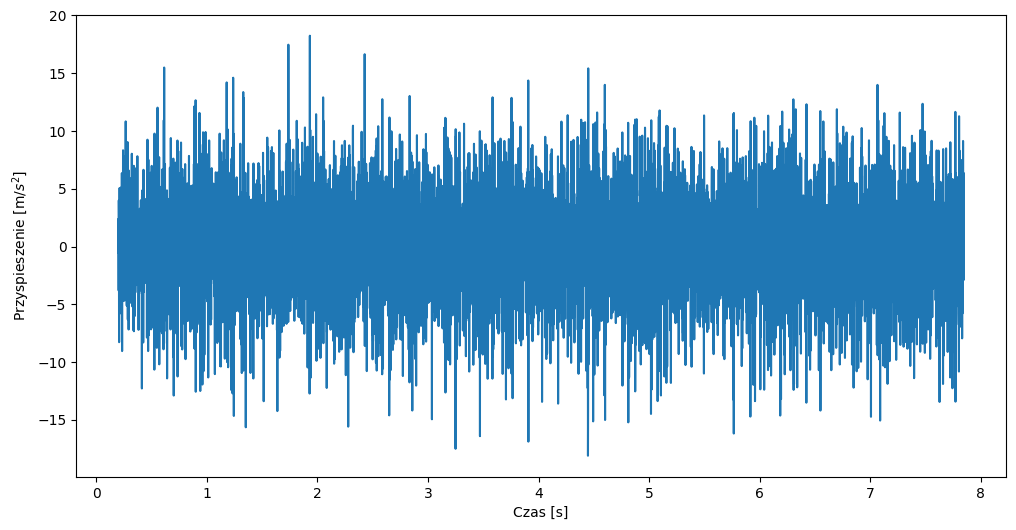

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(bearingA.iloc[::10,0])
plt.xlabel("Czas [s]")
plt.ylabel("Przyspieszenie [m/$s^2$]")

Text(0, 0.5, 'Przyspieszenie [m/$s^2$]')

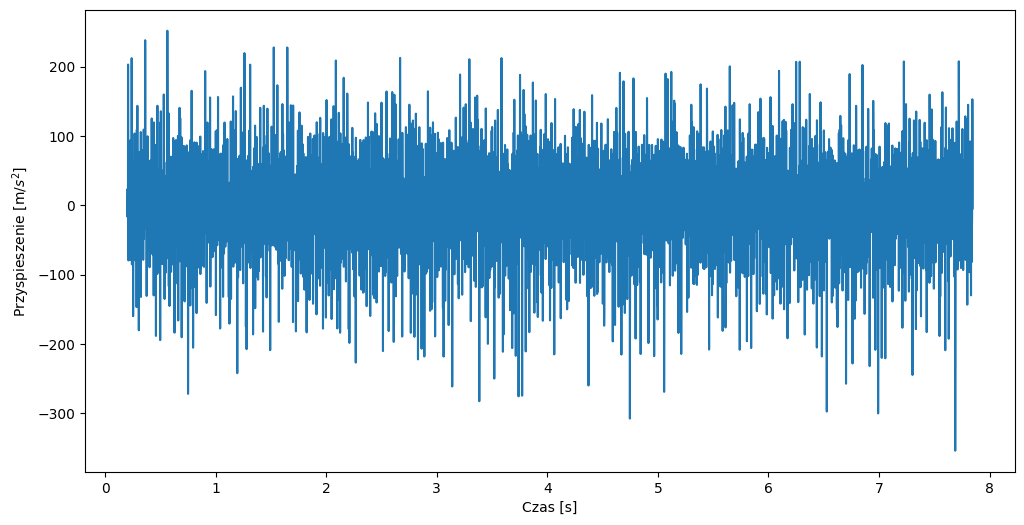

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(bearingB.iloc[::10,0])
plt.xlabel("Czas [s]")
plt.ylabel("Przyspieszenie [m/$s^2$]")

Text(0, 0.5, 'Przyspieszenie [m/$s^2$]')

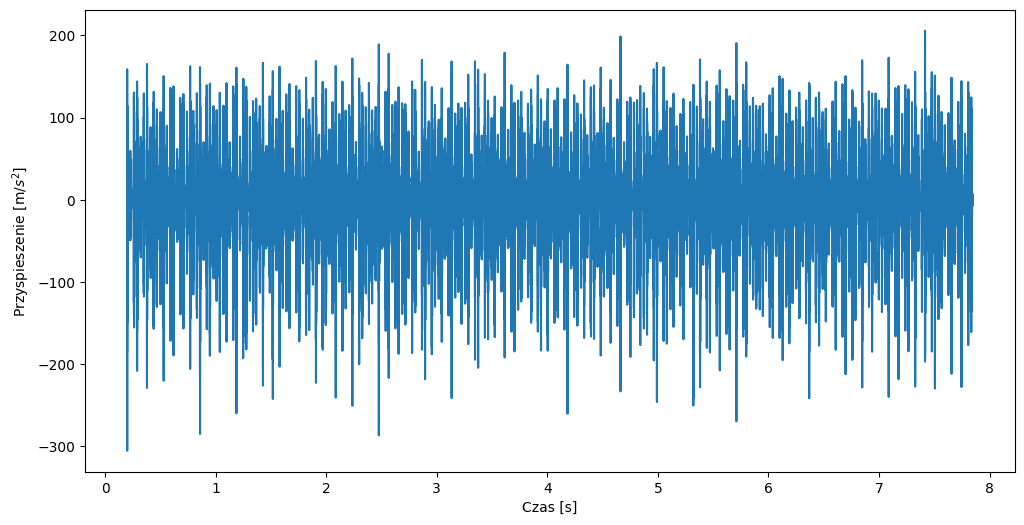

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(bearingC.iloc[:,0])
plt.xlabel("Czas [s]")
plt.ylabel("Przyspieszenie [m/$s^2$]")

Text(0, 0.5, 'Przyspieszenie [m/$s^2$]')

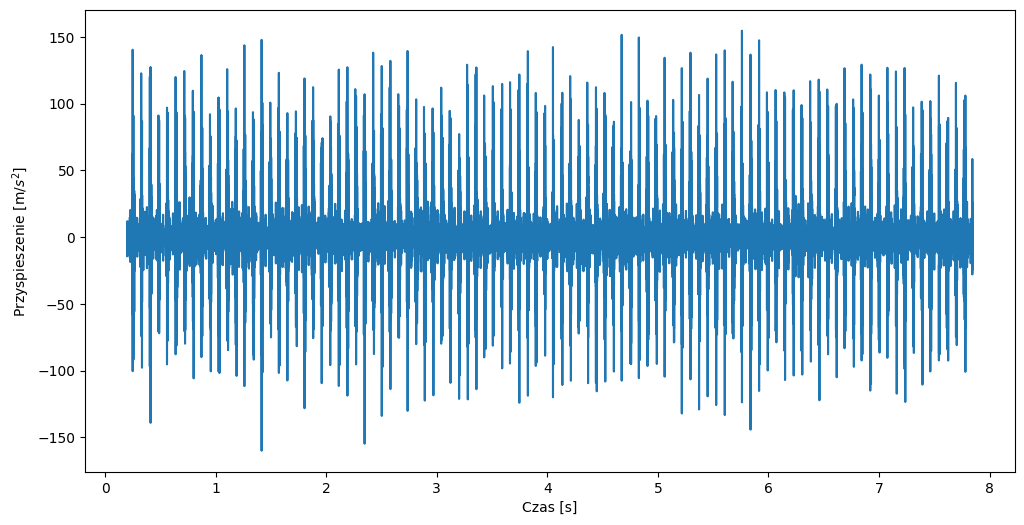

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(bearingD.iloc[:,0])
plt.xlabel("Czas [s]")
plt.ylabel("Przyspieszenie [m/$s^2$]")

Text(0, 0.5, 'Przyspieszenie [m/$s^2$]')

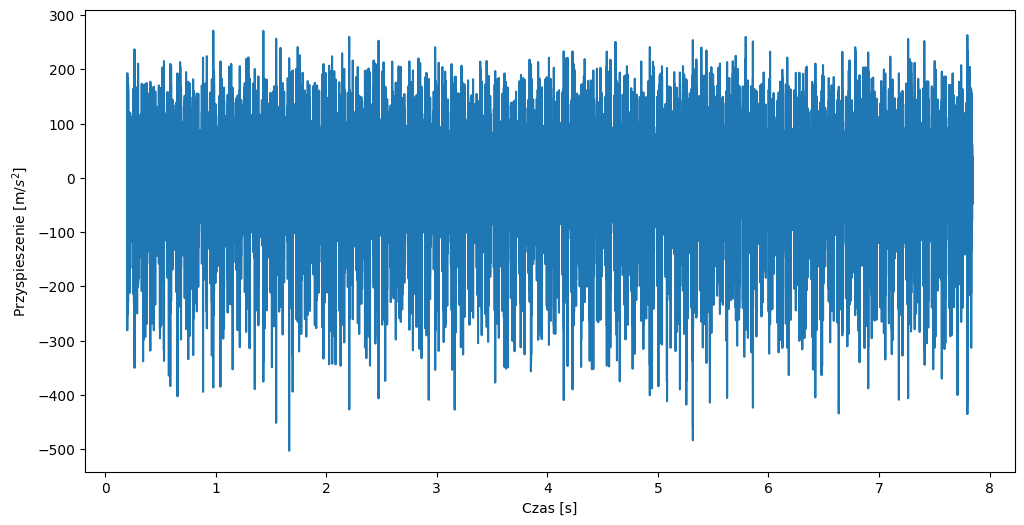

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(bearingE.iloc[:,0])
plt.xlabel("Czas [s]")
plt.ylabel("Przyspieszenie [m/$s^2$]")

Text(0, 0.5, 'Przyspieszenie [m/$s^2$]')

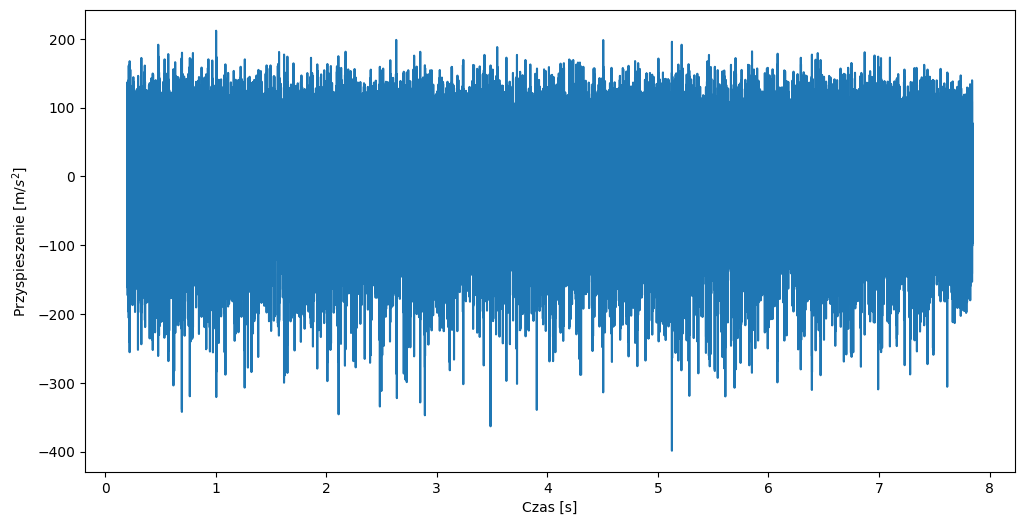

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(bearingF.iloc[:,0])
plt.xlabel("Czas [s]")
plt.ylabel("Przyspieszenie [m/$s^2$]")

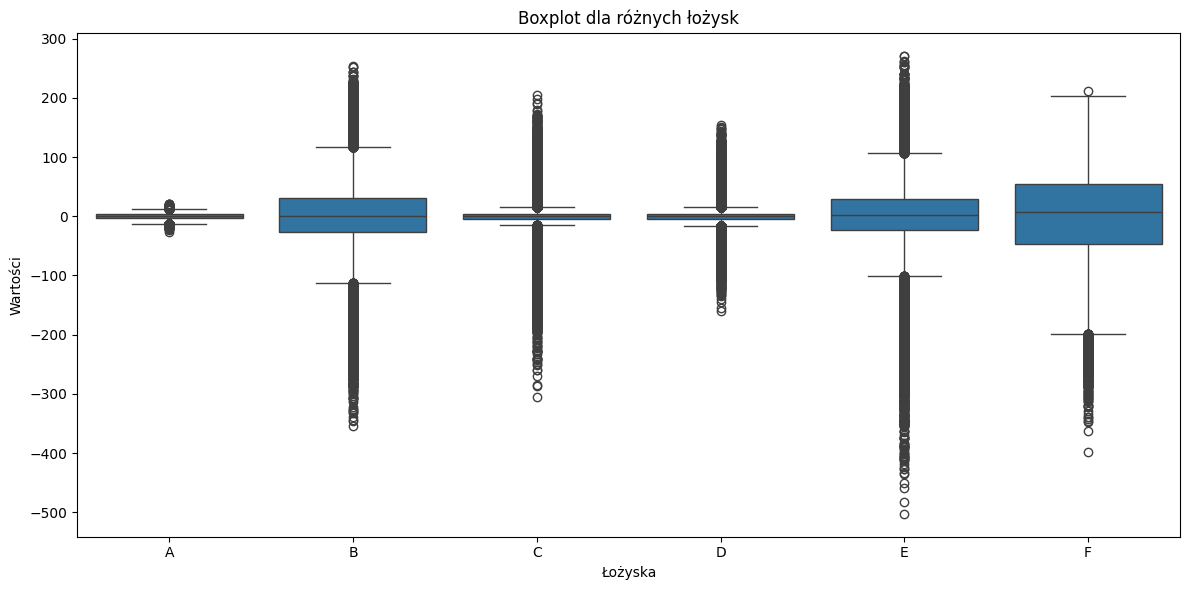

In [36]:
# Łączenie danych w jeden DataFrame
data = pd.concat([bearingA.iloc[:,0], bearingB.iloc[:,0], bearingC.iloc[:,0], bearingD.iloc[:,0], bearingE.iloc[:,0], bearingF.iloc[:,0]], axis=1, keys=['A', 'B', 'C', 'D', 'E', 'F'])

# Spłaszczanie MultiIndex w kolumnach
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Przygotowanie danych do boxplota
data_melted = data.reset_index().melt(id_vars='Time [s]', value_vars=data.columns)

# Tworzenie boxplota
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('Boxplot dla różnych łożysk')
plt.xlabel('Łożyska')
plt.ylabel('Wartości')
plt.tight_layout()
plt.show()

In [37]:
bearingA_to_npArray = bearingA.to_numpy()
bearingA_to_npArray[:,1]

array([ -0.857482,  -2.306301,  -6.568164, ..., -11.80619 , -13.799896,
        -3.848692])

# Function creating features

Feature extraction is a crucial step in sound analysis. We use the librosa library to extract various features from audio recordings. In this case, we extract the following features:

**MFCCs (Mel-frequency cepstral coefficients)**: These coefficients represent the short-term power spectrum of sound, widely used in speech recognition and sound analysis. They provide a good representation of the spectral shape of the sound.

**Chroma STFT (Short-time Fourier Transform)**: It refers to the total energy in each of the twelve different chromatic bands, providing information about the tonality of the sound.

**Spectral Contrast**: Describes the difference in amplitude between peaks and valleys in the sound spectrum, indicating diversity in sound texture.

**Zero Crossing Rate**: It is the frequency at which the signal crosses zero. It's a simple indicator of sound characteristics that can be useful in distinguishing sounds of different textures.

## Function that creating features

In [38]:
def features_creator(segment, sample_rate, condition):

    # Time Domain Features
    rms = librosa.feature.rms(y=segment) 
    zerocrossing_rate = librosa.feature.zero_crossing_rate(y=segment)

    # Statistic features
    mean = statistics.mean(segment)
    skewness = skew(segment)
    variance = statistics.variance(segment)
    kurtos = kurtosis(segment)

    features = {        
        'condition': condition,
        'rms': np.mean(rms, axis=1),
        'zerocrossing_rate': np.mean(zerocrossing_rate, axis=1),
        'mean': mean,
        'variance': variance,
        'skewness': skewness,
        'kurtos': kurtos
      }
    return features

## Function spliting data base to smaller part and using function `features_creator`

In [39]:
def data_spliter_with_feature(db, sample_rate, segment_length, num_segment, condition):
    all_features = []
    i=0
    for column in range(db.shape[1]):
        for iter_seg in range(num_segment):
            start = int(iter_seg * sample_rate * segment_length)
            end = start + int(sample_rate * segment_length)
            segment = db[start:end,column]
            
            if len(segment) == int(sample_rate * segment_length):
                features = features_creator(segment, sample_rate, condition)
            all_features.append(features)
            i += 1
    return pd.DataFrame(all_features)

In [40]:
bearingA.to_numpy().shape[1]

10

## Usage of the function

In [41]:
sample_rate = 8335 
segment_length = 1  
num_segment = 10 # ile badan bylo an jedno lozysko
bratingA_feature = data_spliter_with_feature(bearingA.to_numpy(),sample_rate, segment_length, num_segment, 'A')
bratingB_feature = data_spliter_with_feature(bearingB.to_numpy(),sample_rate, segment_length, num_segment, 'B')
bratingC_feature = data_spliter_with_feature(bearingC.to_numpy(),sample_rate, segment_length, num_segment, 'C')
bratingD_feature = data_spliter_with_feature(bearingD.to_numpy(),sample_rate, segment_length, num_segment, 'D')
bratingE_feature = data_spliter_with_feature(bearingE.to_numpy(),sample_rate, segment_length, num_segment, 'E')
bratingF_feature = data_spliter_with_feature(bearingF.to_numpy(),sample_rate, segment_length, num_segment, 'F')
segmented_df_features = pd.concat([bratingA_feature, bratingB_feature, bratingC_feature, bratingD_feature, bratingE_feature, bratingF_feature]).reset_index()

In [42]:
bearingA.to_numpy()

array([[ -0.519396,  -0.857482,  -3.493313, ...,   6.26509 ,   3.498865,
         -4.10527 ],
       [  2.180017,  -2.306301,  -4.30479 , ...,   5.705778,   2.953023,
         -0.927569],
       [  3.852659,  -6.568164,  -1.653053, ...,   1.397767,   5.700293,
          7.962314],
       ...,
       [  2.640328, -11.80619 ,  -4.744551, ...,   0.638623,   2.343243,
         -9.955027],
       [  3.450035, -13.799896,  -1.833365, ..., -10.877341,   1.161559,
         -9.765238],
       [  4.667976,  -3.848692,   0.140911, ..., -15.218428,  -3.441353,
          3.105687]])

## Naming columns in DataFrame 

In [43]:
def expand_feature_column(series):
    feature_df = pd.DataFrame(series.tolist())
    return feature_df
new_columns = [segmented_df_features['condition']]
for column in segmented_df_features.columns:
    if column != 'condition':
        expanded_feature = expand_feature_column(segmented_df_features[column])
        expanded_feature.columns = [f"{column}_{i}" for i in range(expanded_feature.shape[1])]
        
        new_columns.append(expanded_feature)

numeric_df_features = pd.concat(new_columns, axis=1).drop('index_0', axis=1)


In [44]:
numeric_df_features[numeric_df_features['condition'] == 'A']

,condition,rms_0,zerocrossing_rate_0,mean_0,variance_0,skewness_0,kurtos_0
0,A,4.323822,0.262178,0.003109,20.619268,-0.166976,0.139546
1,A,4.394063,0.270393,-0.003839,21.329056,-0.118681,0.138771
2,A,4.413597,0.262293,0.003153,21.629673,-0.151816,0.182807
3,A,4.420243,0.269617,0.003802,21.350358,-0.188245,0.182140
4,A,4.643815,0.256692,-0.000983,23.679935,-0.137707,0.185598
...,...,...,...,...,...,...,...
95,A,5.679361,0.211770,-0.009357,35.443885,-0.015021,-0.090345
96,A,5.715518,0.199305,-0.007664,35.874256,-0.050267,-0.080872
97,A,5.715518,0.199305,-0.007664,35.874256,-0.050267,-0.080872
98,A,5.715518,0.199305,-0.007664,35.874256,-0.050267,-0.080872


## Vizualization of features

We use the pairplot from the seaborn library to visualize relationships between different features and how they distribute across different sound conditions. This allows for an intuitive understanding of which features may be important in distinguishing between different states.

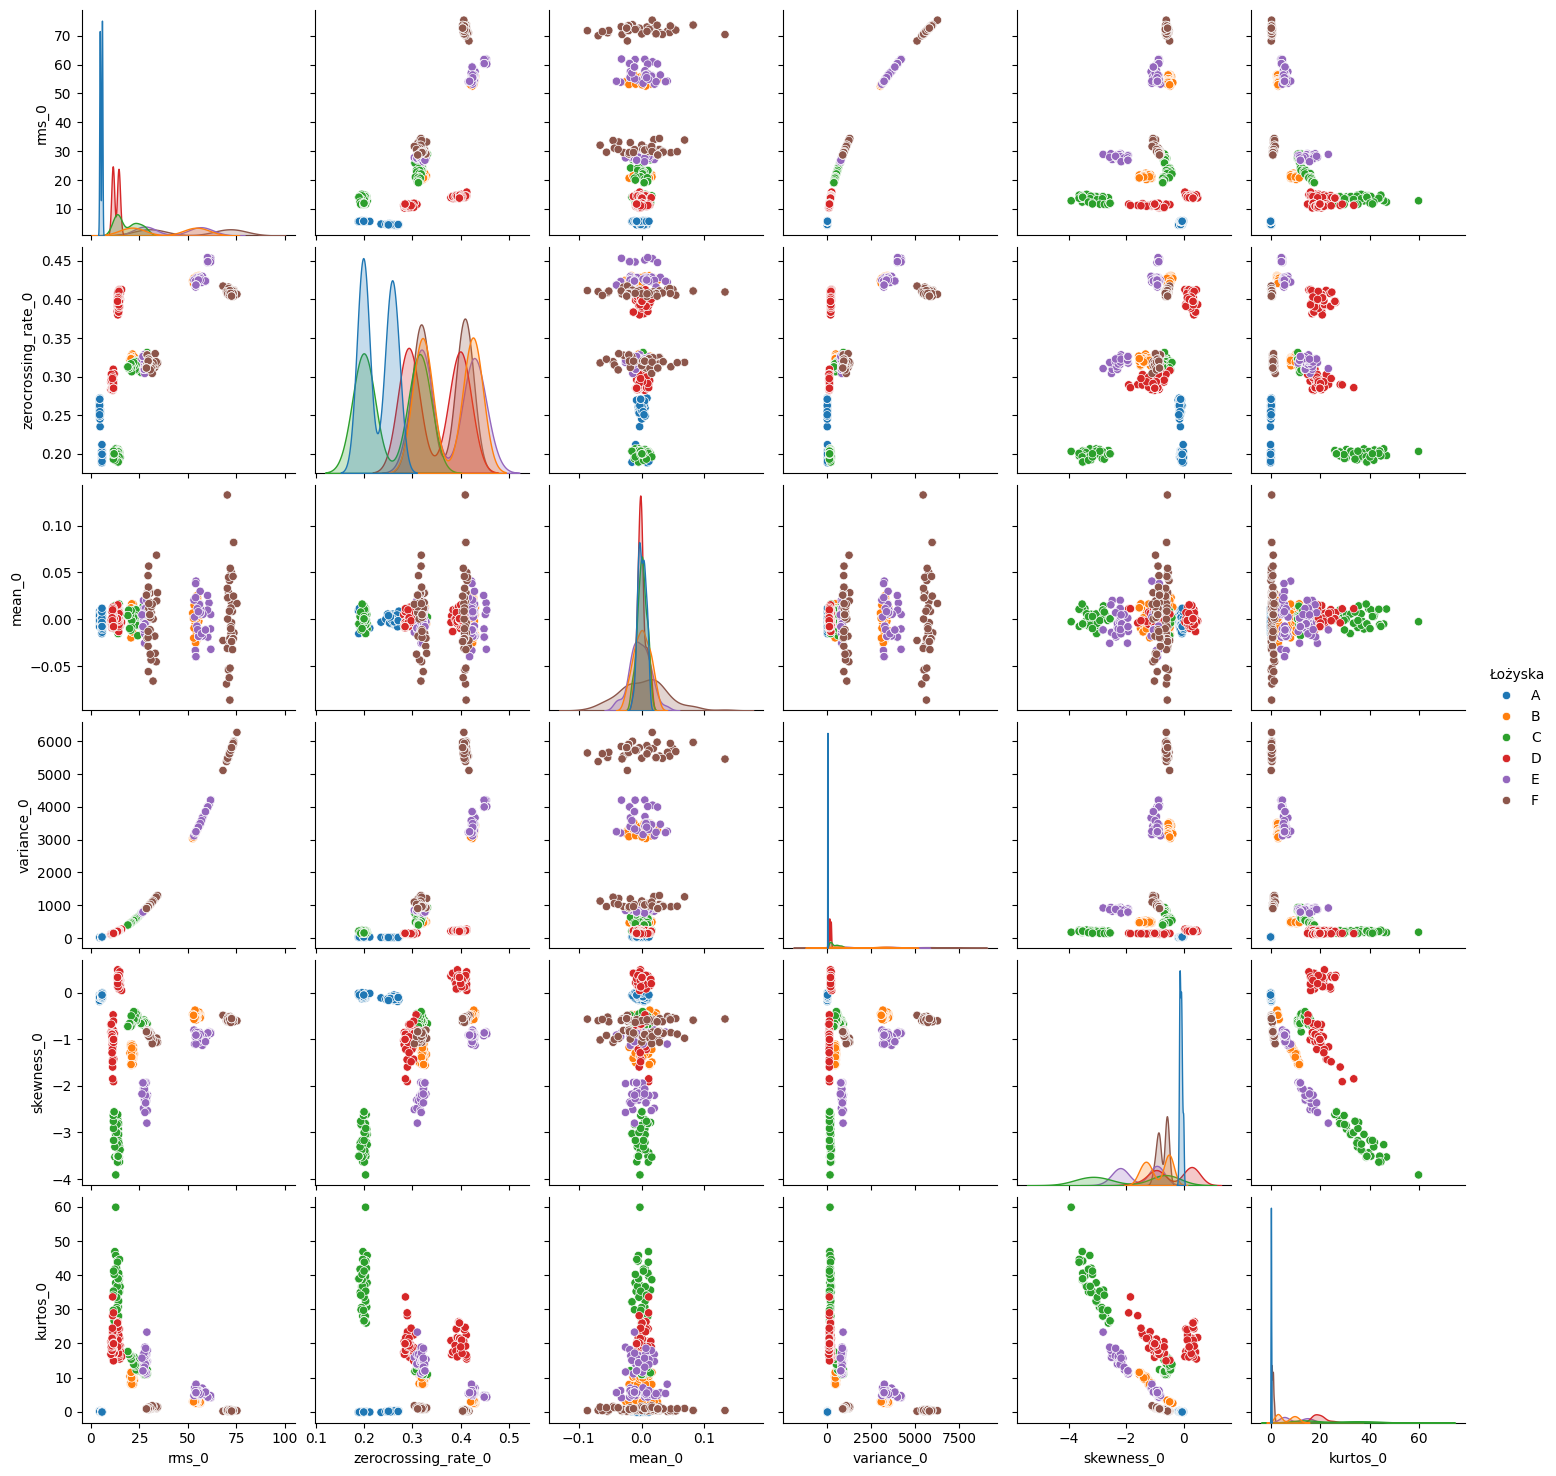

In [45]:
import seaborn as sns

# Wybór podzbioru cech do wizualizacji
selected_columns = numeric_df_features.columns[:]  # Przykładowy wybór pierwszych 5 kolumn cech
selected_df = numeric_df_features[selected_columns]
selected_df['Łożyska'] = numeric_df_features['condition']

# Wyświetlenie sns.pairplot
sns.pairplot(selected_df, hue='Łożyska')

plt.show()

## Correlation Analysis

Spearman correlation analysis is conducted to understand relationships between different features. Masking p-values above a predefined threshold allows focusing only on those correlations that are statistically significant.

C:\Users\Admin\AppData\Local\Temp\ipykernel_15256\2939018696.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = p_values.applymap(lambda x: x > p_value_threshold if pd.notnull(x) else False)


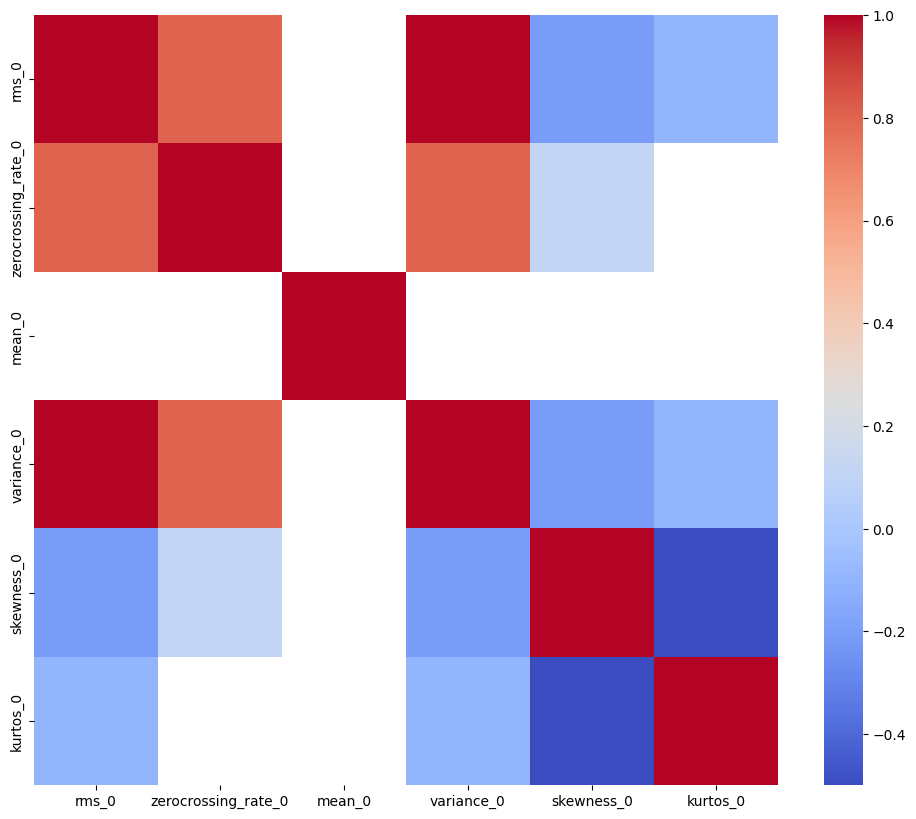

In [46]:
import scipy.stats

# Usunięcie kolumny 'condition' z DataFrame
numeric_features = numeric_df_features.drop('condition', axis=1)

# Obliczenie macierzy korelacji Spearmana
correlation_matrix = numeric_features.corr(method='spearman')

# Inicjalizacja DataFrame do przechowywania wartości p
p_values = pd.DataFrame(index=numeric_features.columns, columns=numeric_features.columns)

# Obliczanie wartości p dla każdej pary kolumn
for col1 in numeric_features.columns:
    for col2 in numeric_features.columns:
        if col1 != col2:
            _, p = scipy.stats.spearmanr(numeric_features[col1], numeric_features[col2])
            p_values.at[col1, col2] = p
        else:
            p_values.at[col1, col2] = np.nan

# Ustawienie progu istotności statystycznej
p_value_threshold = 0.05

# Tworzenie maski dla wartości p
mask = p_values.applymap(lambda x: x > p_value_threshold if pd.notnull(x) else False)

# Wyrysowanie macierzy korelacji z maską
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)
plt.show()

In [47]:
correlation_matrix

,rms_0,zerocrossing_rate_0,mean_0,variance_0,skewness_0,kurtos_0
rms_0,1.000000,0.803337,-0.016851,0.999859,-0.209483,-0.096225
zerocrossing_rate_0,0.803337,1.000000,-0.036850,0.803689,0.114120,-0.039655
mean_0,-0.016851,-0.036850,1.000000,-0.014776,0.020282,-0.025429
variance_0,0.999859,0.803689,-0.014776,1.000000,-0.209799,-0.095996
skewness_0,-0.209483,0.114120,0.020282,-0.209799,1.000000,-0.499483
kurtos_0,-0.096225,-0.039655,-0.025429,-0.095996,-0.499483,1.000000



# Showing database

In [48]:
numeric_df_features

,condition,rms_0,zerocrossing_rate_0,mean_0,variance_0,skewness_0,kurtos_0
0,A,4.323822,0.262178,0.003109,20.619268,-0.166976,0.139546
1,A,4.394063,0.270393,-0.003839,21.329056,-0.118681,0.138771
2,A,4.413597,0.262293,0.003153,21.629673,-0.151816,0.182807
3,A,4.420243,0.269617,0.003802,21.350358,-0.188245,0.182140
4,A,4.643815,0.256692,-0.000983,23.679935,-0.137707,0.185598
...,...,...,...,...,...,...,...
595,F,29.541645,0.319968,-0.012860,960.818087,-0.864038,0.892139
596,F,28.677063,0.311064,0.025801,902.450409,-0.838159,0.836875
597,F,28.677063,0.311064,0.025801,902.450409,-0.838159,0.836875
598,F,28.677063,0.311064,0.025801,902.450409,-0.838159,0.836875


In [49]:
numeric_df_features.dtypes

condition               object
rms_0                  float32
zerocrossing_rate_0    float64
mean_0                 float64
variance_0             float64
skewness_0             float64
kurtos_0               float64
dtype: object

# Statistical Feature Selection

In [50]:
X = numeric_df_features.iloc[:,1:]
y = numeric_df_features['condition']
y

0      A
1      A
2      A
3      A
4      A
      ..
595    F
596    F
597    F
598    F
599    F
Name: condition, Length: 600, dtype: object

In [57]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features, select_features
from sklearn.feature_selection import RFE, VarianceThreshold, mutual_info_classif

# Inicjalizacja enkodera
label_encoder = LabelEncoder()

# Przekształcenie kolumny y
y_numeric = label_encoder.fit_transform(y)
# Model LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X, y_numeric)
lasso_importance = lasso.coef_

# Random Forest
rf = RandomForestClassifier()
rf.fit(X, y_numeric)
rf_importance = rf.feature_importances_

# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
selector.fit(X)
X_variance_threshold = selector.transform(X)

# Mutual Information
mi_importance = mutual_info_classif(X, y_numeric)


In [58]:
# Showing resoults
features = X.columns
results = pd.DataFrame({
    'Feature': features,
    'LASSO Coefficient': lasso_importance,
    'Random Forest Importance': rf_importance,
    'Variance Threshold Selected': selector.get_support(),
    'Mutual Information Score': mi_importance
})
results

,Feature,LASSO Coefficient,Random Forest Importance,Variance Threshold Selected,Mutual Information Score
0,rms_0,0.103459,0.226586,True,1.575965
1,zerocrossing_rate_0,0.000000,0.105280,False,1.329045
2,mean_0,0.000000,0.003402,False,0.838422
3,variance_0,-0.000637,0.214764,True,1.573201
4,skewness_0,-0.000000,0.171750,True,1.431119
5,kurtos_0,0.037165,0.278217,True,1.596311


In [63]:
features_part = results['Feature']
#features_filtered = tsfresh.intersection(features_part) #taking same features from features_part and tsfresh
features_filtered = features_part

## Spliting data

In [64]:
X = numeric_df_features.loc[:,features_filtered]
y = numeric_df_features['condition']
X # showing features

,rms_0,zerocrossing_rate_0,mean_0,variance_0,skewness_0,kurtos_0
0,4.323822,0.262178,0.003109,20.619268,-0.166976,0.139546
1,4.394063,0.270393,-0.003839,21.329056,-0.118681,0.138771
2,4.413597,0.262293,0.003153,21.629673,-0.151816,0.182807
3,4.420243,0.269617,0.003802,21.350358,-0.188245,0.182140
4,4.643815,0.256692,-0.000983,23.679935,-0.137707,0.185598
...,...,...,...,...,...,...
595,29.541645,0.319968,-0.012860,960.818087,-0.864038,0.892139
596,28.677063,0.311064,0.025801,902.450409,-0.838159,0.836875
597,28.677063,0.311064,0.025801,902.450409,-0.838159,0.836875
598,28.677063,0.311064,0.025801,902.450409,-0.838159,0.836875


In [65]:

# Normalize importance values to percentages
filtered = results[results['Feature'].isin(features_filtered)].copy()
results_filtered = pd.DataFrame()

results_filtered['Feature'] = results['Feature']
# Normalize Random Forest Importance
results_filtered['Random Forest Importance %'] = \
    (filtered['Random Forest Importance'] / filtered['Random Forest Importance'].sum()) * 100

# Normalize LASSO Coefficients
results_filtered['LASSO Coefficient %'] = \
    (filtered['LASSO Coefficient'].abs() / filtered['LASSO Coefficient'].abs().sum()) * 100

# Normalize Mutual Information Scores
results_filtered['Mutual Information Score %'] = \
    (filtered['Mutual Information Score'] / filtered['Mutual Information Score'].sum()) * 100

# Display the results
results_filtered = results_filtered[(results_filtered['Random Forest Importance %'] > 4) & 
                                    (results_filtered['Mutual Information Score %'] > 2.1) | 
                                    (results_filtered['LASSO Coefficient %'] > 30)]
results_filtered['Selected by tsfresh'] = results_filtered['Feature'].isin(features_filtered).astype(int)

results_filtered

,Feature,Random Forest Importance %,LASSO Coefficient %,Mutual Information Score %,Selected by tsfresh
0,rms_0,22.658634,73.239691,18.887259,1
1,zerocrossing_rate_0,10.528033,0.000000,15.928033,1
3,variance_0,21.476424,0.451214,18.854133,1
4,skewness_0,17.174974,0.000000,17.151342,1
5,kurtos_0,27.821700,26.309095,19.131100,1


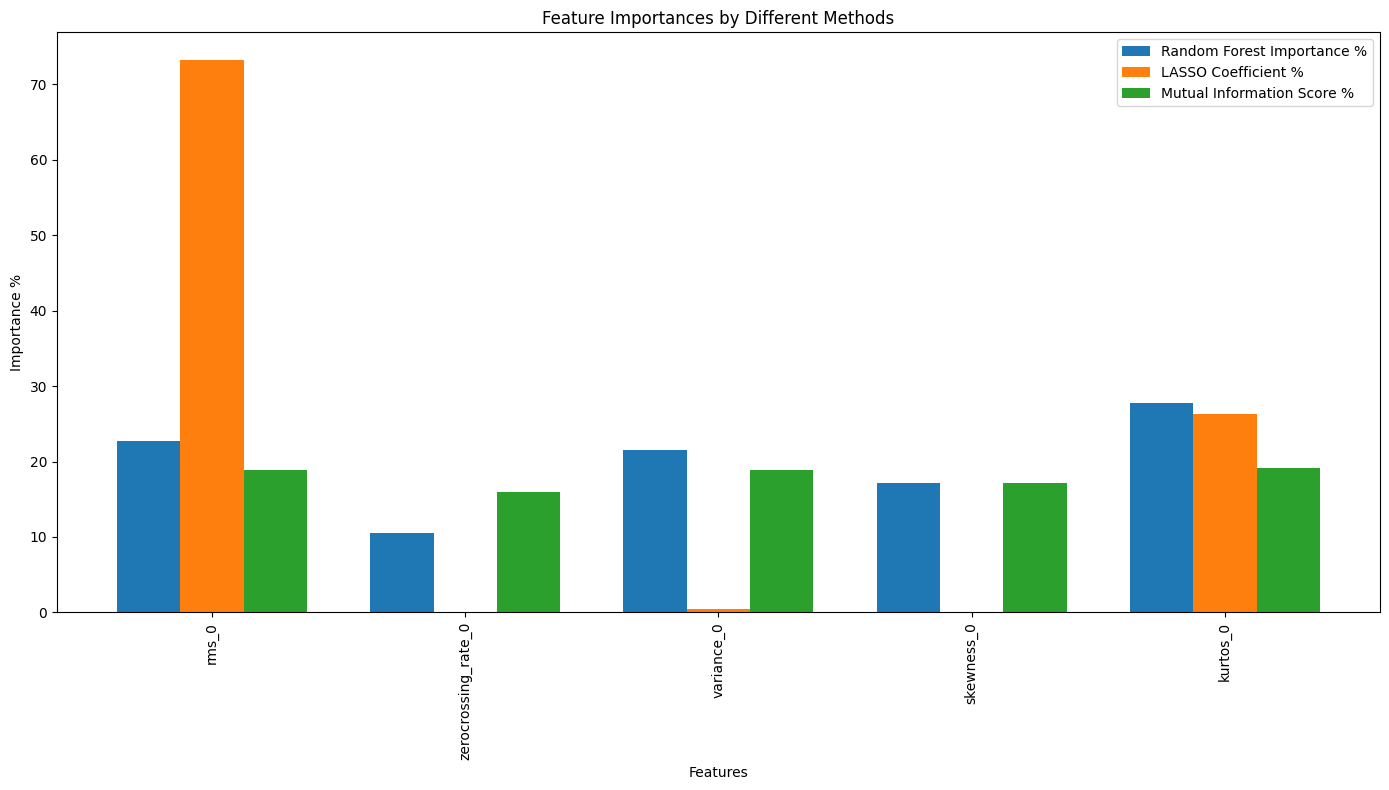

In [66]:
# Plotting
plt.figure(figsize=(14, 8))
bar_width = 0.25
index = np.arange(len(results_filtered))

# Random Forest Importance
plt.bar(index, results_filtered['Random Forest Importance %'], bar_width, label='Random Forest Importance %')

# LASSO Coefficient
plt.bar(index + bar_width, results_filtered['LASSO Coefficient %'], bar_width, label='LASSO Coefficient %')

# Mutual Information Score
plt.bar(index + 2 * bar_width, results_filtered['Mutual Information Score %'], bar_width, label='Mutual Information Score %')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Importance %')
plt.title('Feature Importances by Different Methods')
plt.xticks(index + bar_width, results_filtered['Feature'], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Building model

In [67]:
# importing models
from sklearn.tree import DecisionTreeClassifier
# importing random forest
from sklearn.ensemble import RandomForestClassifier
# import gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier


In [68]:
from sklearn.model_selection import cross_val_score

# Define the model decision tree
bearing_model_tree = DecisionTreeClassifier(random_state=1)

# Define the model random forest
bearing_model_rf = RandomForestClassifier(random_state=1)

# Define the model gradient boosting
bearing_model_gb = GradientBoostingClassifier(random_state=1)

# Perform cross-validation
cv_scores_tree = cross_val_score(bearing_model_tree, X, y, cv=5) 
cv_scores_rf = cross_val_score(bearing_model_rf, X, y, cv=5)
cv_scores_gb = cross_val_score(bearing_model_gb, X, y, cv=5)
cv_scores_gb

array([0.84166667, 1.        , 0.91666667, 0.95      , 1.        ])

In [70]:
cv_scores = [cv_scores_tree, cv_scores_rf, cv_scores_gb]
model_names = ['Drzewo decyzyjne', 'Las losowy', 'Wzmacnianie gradientowe'] 

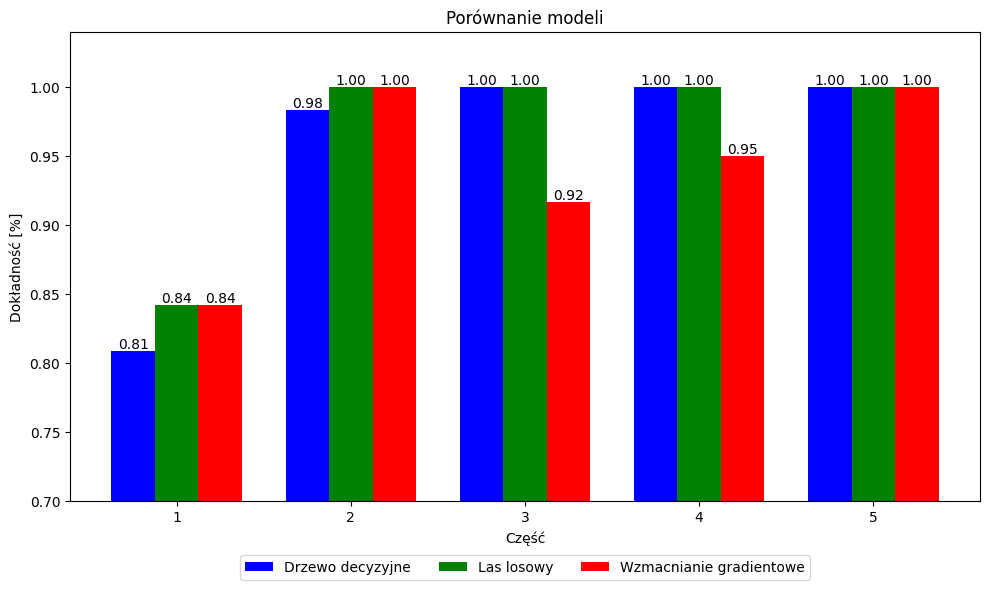

In [71]:
# Plot all models on the same plot
def show_combined_plots(cv_scores_all, model_names):
    plt.figure(figsize=(10, 6))
    
    # Define colors for each model
    colors = ['b', 'g', 'r']
    
    # Plotting all scores in a grouped manner
    bar_width = 0.25
    index = np.arange(len(cv_scores_tree))
    
    # Bars for each model with different colors
    bars_tree = plt.bar(index, cv_scores_tree, bar_width, label=model_names[0], color=colors[0])
    bars_rf = plt.bar(index + bar_width, cv_scores_rf, bar_width, label=model_names[1], color=colors[1])
    bars_gb = plt.bar(index + 2 * bar_width, cv_scores_gb, bar_width, label=model_names[2], color=colors[2])
    
    # Annotate each bar with its value for all models
    for bars in [bars_tree, bars_rf, bars_gb]:
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{height:.2f}',
                ha='center',
                va='bottom'
            )
    
    plt.xlabel('Część')
    plt.ylabel('Dokładność [%]')
    plt.title('Porównanie modeli')
    plt.ylim(0.7, 1.04)  # Assuming accuracy ranges from 0 to 1
    
    plt.xticks(index + bar_width, ['1', '2', '3', '4', '5'])  # X-axis ticks
    
    # Przenieś legendę pod wykres
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

        
    plt.tight_layout()
    plt.show()

# Show combined plot
show_combined_plots(cv_scores, model_names)


In [72]:
cv_scores

[array([0.80833333, 0.98333333, 1.        , 1.        , 1.        ]),
 array([0.84166667, 1.        , 1.        , 1.        , 1.        ]),
 array([0.84166667, 1.        , 0.91666667, 0.95      , 1.        ])]